# Himawari 8

## Data Description

himawari8 資料說明如下：
1. Domain: 31/114 - 16/129
2. Dimension: 3300 x 3300
3. .txt 的資料排列順序一樣是從 31/114 - 16/129 by latitude
4. 數值是 Brightness temperature


## Read the data

First, let's read the data

(3300, 3300)


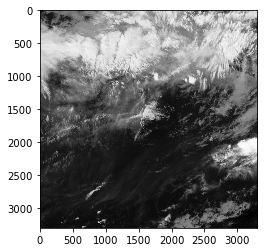

In [24]:
import numpy as np
import pandas as pd

def read_himawari8_txt(furi):
    ''' The method reads in a Himawari 8 image in plain text format. 
        the text file contains 10,890,000 lines, and each line contains 
        a float point number represent the brightness temperature. '''
    # Read in data
    with open(furi) as f:
        lines = f.readlines()
    # Re-shape the data
    data = np.array(lines, dtype=np.float).reshape((3300,3300))
    return(data)

tmp = read_himawari8_txt('../data/himawari8/20170601_0000.txt')
print(tmp.shape)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(tmp, alpha=0.99, cmap='Greys')
plt.show()

## Plot on map

Then, let's plot the data on the map.

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


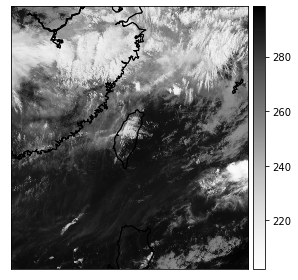

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat0 = 16. - 15/3300
lat1 = 31.
lon0 = 114. - 15/3300
lon1 = 129.

#plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l', epsg=3826)
m.drawcoastlines()
m.imshow(np.flipud(tmp), alpha=0.99, cmap='Greys')     # Draw a filled-contour plot with the interpolated grid data
m.drawcoastlines()                          # Draw the coastlines
cb = m.colorbar()                           # Show colorbar

plt.tight_layout()
plt.show()